In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('.../steam.csv')

### Data Preview

In [3]:
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
df.tail(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19


In [5]:
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


From the table, the max values in numerical columns are way larger than the 75% values, so there are outliers in this dataset. The outliers can be further checked by boxplots

Check the data types and null values:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

Check the duplicated values:

In [7]:
# Check duplicated values
df.duplicated().sum()

0

### Data Exploration

#### **appid** & **name**

In [8]:
len(df.appid.unique())

27075

The "appid" column is the unique number of each game. I'm not interested in this column so it can be dropped.

In [9]:
df = df.drop("appid", axis=1)

In [10]:
len(df.name.unique())

27033

There are games with same name, so I am going to check them:

In [11]:
# Select the duplicated names
df[df.duplicated(subset='name', keep=False)].sort_values(by='name').head(6)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
26587,2048,2019-02-21,1,Dexion Games,Dexion Games,windows,0,Single-player,Casual;Indie;Simulation,Indie;Casual;Simulation,0,0,1,0,0,0-20000,0.79
24723,2048,2018-10-31,1,Lucas Alexander Visual Arts;Nicolai Clemmensen...,Lucas Alexander Visual Arts,windows;linux,0,Single-player;Steam Achievements;Partial Contr...,Casual;Indie;Strategy,Casual;Strategy;Indie,15,4,0,0,0,0-20000,4.49
22740,Alone,2018-06-21,1,Avasion,Avasion,windows,0,Single-player;Steam Achievements;Partial Contr...,Adventure;Casual;Indie,Adventure;Indie;Casual,7,17,5,0,0,0-20000,0.79
21554,Alone,2018-05-01,1,Killed Pixel Games,Killed Pixel Games,windows,0,Single-player;Steam Achievements,Adventure;Indie;Simulation;Strategy,Strategy;Adventure;Indie,20,9,2,0,0,0-20000,0.79
968,Alter Ego,2010-08-03,1,bitComposer Games,Viva Media,windows,0,Single-player,Adventure,Adventure;Point & Click;Mystery,0,139,59,12,12,20000-50000,7.19
15544,Alter Ego,2017-08-08,1,Choose Multiple LLC,Choose Multiple LLC,windows;mac;linux,0,Single-player;Captions available;Steam Cloud,Adventure;Casual;Indie;RPG;Simulation,RPG;Casual;Simulation,0,17,8,0,0,0-20000,5.59


It seems the games with same name are not the same one, so I will keep them.

#### **release_date**

Check the number of games published in each year.

In [12]:
# Convert 'release_date' to datetime format and extract the year
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Count the occurrences of each release year
yearly_counts = df['release_year'].value_counts()

print(yearly_counts)

2018    8160
2017    6357
2016    4361
2015    2597
2019    2213
2014    1555
2013     418
2012     320
2009     305
2011     239
2010     238
2008     145
2007      93
2006      48
2005       6
2004       6
2001       4
2003       3
2000       2
1999       2
2002       1
1998       1
1997       1
Name: release_year, dtype: int64


I am interested to see the games published in 90' :

In [13]:
df.loc[df.release_year < 2000, "name"]

1           Team Fortress Classic
4       Half-Life: Opposing Force
6                       Half-Life
2685         Carmageddon Max Pack
Name: name, dtype: object

Draw a distribution bar graph to see the games published in years:

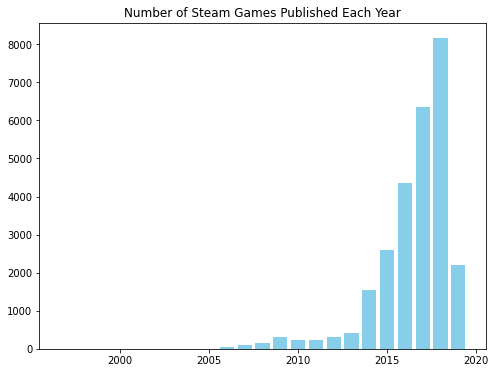

In [14]:
from scipy.interpolate import make_interp_spline

# Sort the years in ascending order
yearly_counts = yearly_counts.sort_index()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a bar chart based on the release year distribution
plt.bar(yearly_counts.index, yearly_counts, color='skyblue')

# Add labels and title
#plt.xlabel('Release Year')
#plt.ylabel('Number of Indie Games Published')
plt.title('Number of Steam Games Published Each Year')

# Display the plot
plt.show()

#### **english**

In [15]:
df.english.value_counts()

1    26564
0      511
Name: english, dtype: int64

In [16]:
# Change the 0 to non-english and 1 to english
map_dict = {0: 'non-English', 1: 'English'}

df['english'] = df['english'].map(map_dict)

Draw the pie chart to see the percentage:

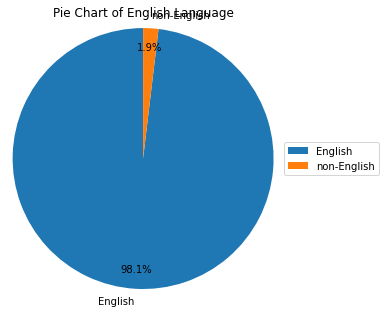

In [17]:
# Count the occurrences of each entry in the 'Category' column
english_counts = df.english.value_counts()

# Set a larger figure size
plt.figure(figsize=(5, 5))

# Plot a pie chart with increased spacing
plt.pie(english_counts, labels=english_counts.index, autopct='%1.1f%%', startangle=90, radius = 1.2,pctdistance=0.85, labeldistance=1.1)

# Add a title
plt.title('Pie Chart of English Language')

# Move the legend to a better location
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

#### **develper** & **pulisher**

In [18]:
developer_counts = df.developer.value_counts()

developer_counts.head(10)

Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
Dexion Games                  45
RewindApp                     43
Hosted Games                  42
Blender Games                 40
For Kids                      36
Name: developer, dtype: int64

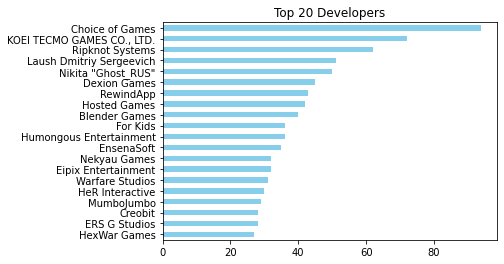

In [19]:
# Select the top 20 value counts
top_20_developer = developer_counts.head(20).sort_values(ascending=True)

# Plot a horizontal bar chart
top_20_developer.plot(kind='barh', color='skyblue')
#plt.xlabel('Count')
#plt.ylabel('Name')
plt.title('Top 20 Developers')
plt.show()

In [20]:
publisher_counts = df.publisher.value_counts()

publisher_counts.head(10)

Big Fish Games         212
Strategy First         136
Ubisoft                111
THQ Nordic              98
Square Enix             97
Sekai Project           96
Choice of Games         94
1C Entertainment        88
Dagestan Technology     88
SEGA                    78
Name: publisher, dtype: int64

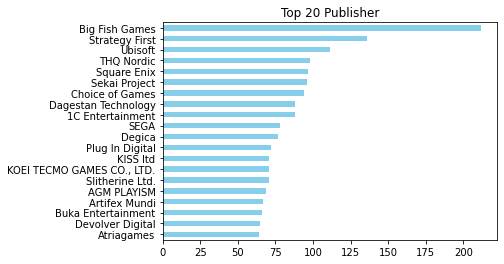

In [21]:
# Select the top 20 value counts
top_20_publisher = publisher_counts.head(20).sort_values(ascending=True)

# Plot a horizontal bar chart
top_20_publisher.plot(kind='barh', color='skyblue')
#plt.xlabel('Count')
#plt.ylabel('Name')
plt.title('Top 20 Publisher')
plt.show()

#### **platform**

Draw the pie chart to show the operating system platform

<Figure size 360x360 with 0 Axes>

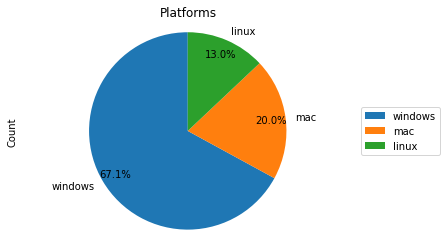

In [22]:
# Split the values and create a list of all unique elements
all_elements = ';'.join(df['platforms']).split(';')
unique_elements = list(set(all_elements))

# Count the occurrences of each element
element_counts = [all_elements.count(element) for element in unique_elements]

# Create a DataFrame with the counts
count_df = pd.DataFrame({'Element': unique_elements, 'Count': element_counts})

# Set a larger figure size
plt.figure(figsize=(5, 5))

# Plot a pie chart
count_df.plot.pie(y='Count', labels=count_df['Element'], autopct='%1.1f%%', startangle=90, radius = 1.2,pctdistance=0.85, labeldistance=1.1)

# Move the legend to a better location
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Platforms')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()


#### **required_age**

In [23]:
age_counts = df['required_age'].value_counts()
print(age_counts)

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64


#### **categories** & **genres**

In [24]:
df.categories.value_counts().head(10)

Single-player                                                                               6110
Single-player;Steam Achievements                                                            2334
Single-player;Steam Achievements;Steam Trading Cards                                         848
Single-player;Partial Controller Support                                                     804
Single-player;Steam Trading Cards                                                            792
Single-player;Steam Achievements;Steam Cloud                                                 653
Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud                             652
Single-player;Steam Achievements;Full controller support;Steam Trading Cards;Steam Cloud     585
Single-player;Full controller support                                                        562
Single-player;Steam Achievements;Full controller support                                     477
Name: categories, dtype: int64

In [25]:
count_single = df.categories.str.contains("Single-player").sum()
count_multiple = df.categories.str.contains("Multi-player").sum()

In [26]:
playing_way = ["Single-player", "Multi-player"]
playing_way_counts = [count_single, count_multiple]

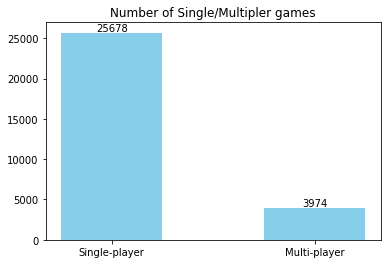

In [27]:
# Create a bar chart
plt.bar(playing_way, playing_way_counts, color='skyblue', width=0.5)

# Add labels and title
plt.title('Number of Single/Multipler games')

# Add numbers on top of the bars
for i, count in enumerate(playing_way_counts):
    plt.text(playing_way[i], count + 0.1, str(count), ha='center', va='bottom')

# Display the chart
plt.show()

In [28]:
genres_counts = df.genres.value_counts()

print(genres_counts.head(10))

Action;Indie              1852
Casual;Indie              1482
Action;Adventure;Indie    1229
Adventure;Indie           1170
Action;Casual;Indie       1004
Action                     843
Adventure;Casual;Indie     801
Indie                      759
Casual                     560
Adventure                  535
Name: genres, dtype: int64


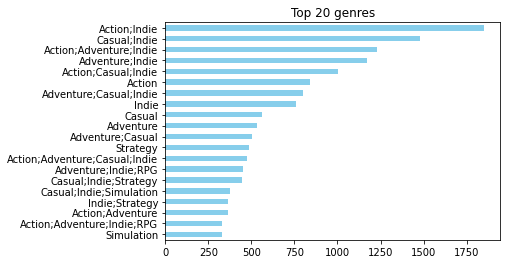

In [29]:
# Select the top value counts
top_genres = genres_counts.head(20).sort_values(ascending=True)

# Plot a horizontal bar chart
top_genres.plot(kind='barh', color='skyblue')
#plt.xlabel('Count')
#plt.ylabel('Name')
plt.title('Top 20 genres')
plt.show()

In [30]:
count_indie = df.genres.str.contains("Indie").sum()
count_nonindie = df.shape[0] - count_indie

In [31]:
game_build = ["Indie", "non-indie"]
game_build_count = [count_indie, count_nonindie]

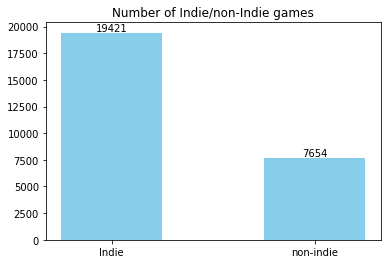

In [32]:
# Create a bar chart
plt.bar(game_build, game_build_count, color='skyblue', width=0.5)

# Add labels and title
plt.title('Number of Indie/non-Indie games')

# Add numbers on top of the bars
for i, count in enumerate(game_build_count):
    plt.text(game_build[i], count + 0.1, str(count), ha='center', va='bottom')

# Display the chart
plt.show()

#### **achievement**

Games which obtain top achievements

In [33]:
df.nlargest(5, 'achievements')

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,release_year
12604,LOGistICAL,2017-02-15,English,Sacada,Sacada,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Strategy,Casual;Strategy;Indie,9821,125,35,0,0,50000-100000,6.99,2017
14735,Drive-By Hero,2017-06-19,English,Idea Cabin,Idea Cabin,windows;mac;linux,0,Single-player;Steam Achievements,Violent;Gore;Action;Casual;Indie;Early Access,Early Access;Action;Indie,5394,45,78,0,0,0-20000,1.59,2017
9371,Ninja Stealth,2016-09-29,English,SC Jogos,SC Jogos,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;Strategy,Indie;Casual;Strategy,5000,181,90,227,227,50000-100000,0.79,2016
13071,Ninja Stealth 2,2017-01-30,English,SC Jogos,SC Jogos,windows,0,Single-player;Steam Achievements;Steam Trading...,Action;Adventure;Indie;RPG;Strategy,Indie;Strategy;Adventure,5000,81,73,129,140,20000-50000,0.79,2017
13169,Archery Practice VR,2017-02-08,English,Virtual Rage Studios LLC,Virtual Rage Studios LLC,windows,0,Single-player;Steam Trading Cards,Action;Adventure;Casual;Indie;RPG,Indie;Action;Casual,5000,51,85,143,143,200000-500000,0.79,2017


In [34]:
len(df.achievements[df.achievements<70]) / df.shape[0]

0.952539242843952

In [35]:
df.achievements.value_counts().head(5)

0     11864
10      679
12      618
20      574
15      490
Name: achievements, dtype: int64

In [36]:
achievements_counts = df.achievements[(df.achievements<70) & (df.achievements>0)].value_counts().sort_index(ascending=True)

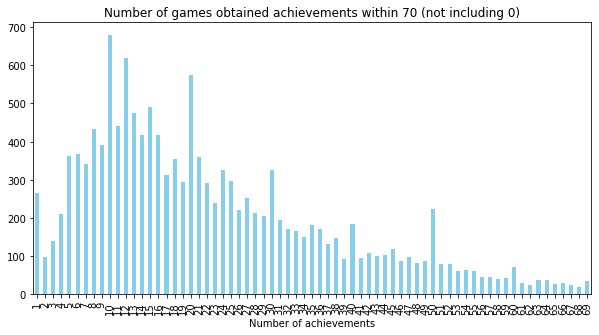

In [37]:
# Select the top value counts
top_achvmt = achievements_counts.sort_index(ascending=True)

plt.figure(figsize=(10, 5))

# Plot a horizontal bar chart
top_achvmt.plot(kind='bar', color='skyblue')

plt.xlabel('Number of achievements')
#plt.ylabel('Name')
plt.title('Number of games obtained achievements within 70 (not including 0)')
plt.show()

#### **positive rating & negative rating**

Create two columns: number of total ratings, positive rate

In [38]:
# Calculate the numbers of total ratings and create a new column
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']

# Calculate the positive rate and create a new column
df['positive_rate'] = round(df['positive_ratings']/df['total_ratings'] , 2)

Games which have top numbers of ratings 

In [39]:
rating_counts = df.total_ratings[(df.total_ratings<100)].value_counts().sort_index(ascending=True)

print(rating_counts.head(5))

1    1014
2     920
3     847
4     803
5     688
Name: total_ratings, dtype: int64


In [40]:
df.total_ratings.describe()

count    2.707500e+04
mean     1.211586e+03
std      2.242909e+04
min      1.000000e+00
25%      1.000000e+01
50%      3.600000e+01
75%      1.760000e+02
max      3.046717e+06
Name: total_ratings, dtype: float64

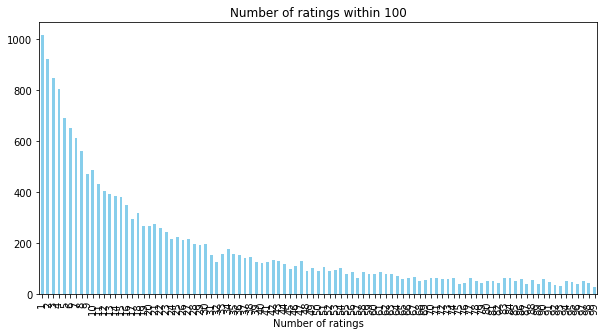

In [41]:
# Select the top value counts
top_rating = rating_counts.sort_index(ascending=True)

plt.figure(figsize=(10, 5))

# Plot a horizontal bar chart
top_rating.plot(kind='bar', color='skyblue')

plt.xlabel('Number of ratings')
#plt.ylabel('Name')
plt.title('Number of ratings within 100')
plt.show()

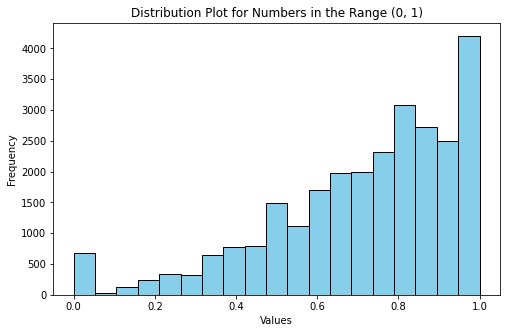

In [42]:
# Plot the distribution bar plot
plt.figure(figsize=(8, 5))
plt.hist(df.positive_rate, bins=np.linspace(0, 1, 20), edgecolor='black', color='skyblue')  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Plot for Numbers in the Range (0, 1)')

# Display the plot
plt.show()

Games which have ratings more than 200k

In [43]:
df[df['total_ratings'] > 200000][['name', 'total_ratings']]

,name,total_ratings
19,Team Fortress 2,549915
21,Left 4 Dead 2,260207
22,Dota 2,1005586
25,Counter-Strike: Global Offensive,3046717
121,Garry's Mod,380154
1025,The Elder Scrolls V: Skyrim,252254
1120,Terraria,263397
1467,PAYDAY 2,365180
1634,Warframe,246809
2016,Rust,274079


Games which have the top users (top ratings)

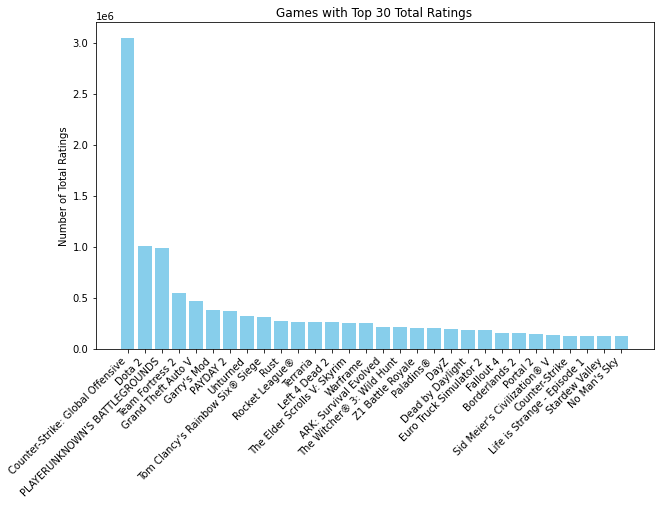

In [44]:
# Sort the DataFrame by total_ratings in descending order
total_rating_sorted = df.sort_values(by='total_ratings', ascending=False).head(30)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_rating_sorted['name'], total_rating_sorted['total_ratings'], color='skyblue')

# Add labels and title
plt.ylabel('Number of Total Ratings')
plt.title('Games with Top 30 Total Ratings')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


Games with top positive rate

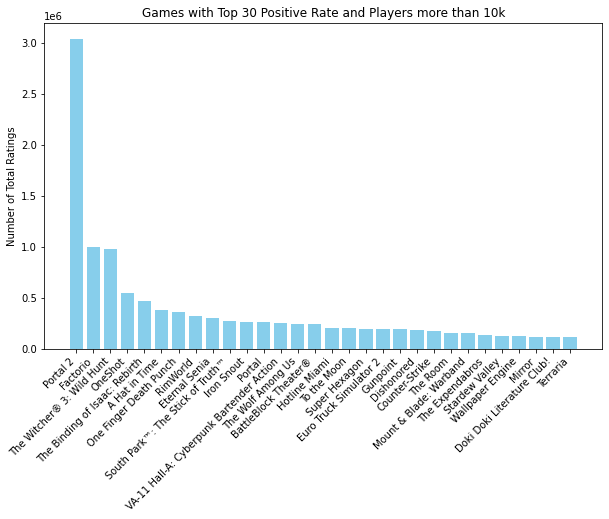

In [45]:
# Sort the DataFrame by total_ratings in descending order
pos_rate_sorted = df[df['total_ratings'] > 10000].sort_values(by='positive_rate', ascending=False).head(30)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(pos_rate_sorted['name'], total_rating_sorted['total_ratings'], color='skyblue')

# Add labels and title
plt.ylabel('Number of Total Ratings')
plt.title('Games with Top 30 Positive Rate and Players more than 10k')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Find the games with top owners

In [46]:
df.owners.value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [47]:
df[(df['owners'] == "100000000-200000000") |
            (df['owners'] == "50000000-100000000") |
            (df['owners'] == "20000000-50000000")
            ][['name', 'owners']]

,name,owners
19,Team Fortress 2,20000000-50000000
22,Dota 2,100000000-200000000
25,Counter-Strike: Global Offensive,50000000-100000000
1634,Warframe,20000000-50000000
3362,Unturned,20000000-50000000
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,50000000-100000000


#### **average_playtime & median_playtime**

Find the games of outliers

In [48]:
df[(df['median_playtime'] > 150000) & (df['median_playtime'] > df['average_playtime'])][['name','median_playtime','average_playtime']]

,name,median_playtime,average_playtime
1478,The Banner Saga: Factions,190489,95245
6014,The Secret of Tremendous Corporation,190445,95242


In [49]:
df[(df['average_playtime'] < 50000) & (df['median_playtime'] > 50000) & (df['median_playtime'] > df['average_playtime'])][['name','median_playtime','average_playtime']]

,name,median_playtime,average_playtime
2023,Fantasy Grounds,86148,43074
23409,懒人修仙传,71857,43632


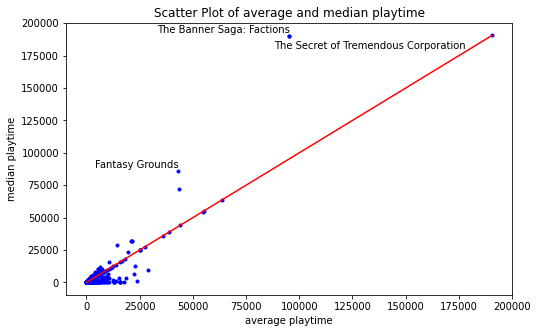

In [50]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['average_playtime'], df['median_playtime'], color='blue', marker='.')

# Label specific points
label_points = df[df['name'].isin(['The Banner Saga: Factions'])]
for index, row in label_points.iterrows():
    plt.annotate(row['name'], (row['average_playtime'], row['median_playtime']),
                 textcoords="offset points", xytext=(1,1), ha='right', va='bottom')

label_points = df[df['name'].isin(['The Secret of Tremendous Corporation'])]
for index, row in label_points.iterrows():
    plt.annotate(row['name'], (row['average_playtime'], row['median_playtime']),
                 textcoords="offset points", xytext=(-15,-15), ha='left', va='bottom')

label_points = df[df['name'].isin(['Fantasy Grounds'])]
for index, row in label_points.iterrows():
    plt.annotate(row['name'], (row['average_playtime'], row['median_playtime']),
                 textcoords="offset points", xytext=(1,1), ha='right', va='bottom')


# Add the line y=x
x_values = np.linspace(min(df['average_playtime'].min(), df['median_playtime'].min()),
                       max(df['average_playtime'].max(), df['median_playtime'].max()), 100)
plt.plot(x_values, x_values, color='red', linestyle='-', label='y=x')


# Add labels and title
plt.xlabel('average playtime')
plt.ylabel('median playtime')
plt.title('Scatter Plot of average and median playtime')

# Display the plot
plt.show()

In [51]:
df.median_playtime.sort_values(ascending=True).tail(5)

23409     71857
2023      86148
6014     190445
1478     190489
9201     190625
Name: median_playtime, dtype: int64

#### **price**

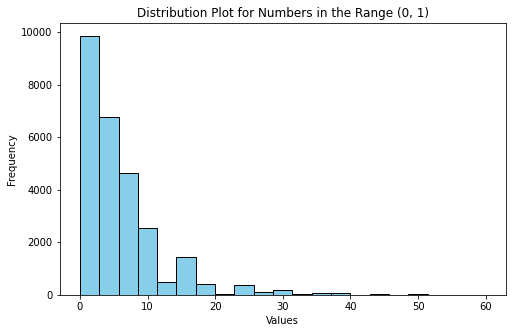

In [52]:
# Plot the distribution bar plot
plt.figure(figsize=(8, 5))
plt.hist(df.price, bins=np.linspace(0, 60, 22), edgecolor='black', color='skyblue')  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Plot for Numbers in the Range (0, 1)')

# Display the plot
plt.show()